## Fitting Sine Data - Regression

### Problem

Fit given data (regression function)

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

import warnings
warnings.filterwarnings(action="ignore")

In [14]:
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Data

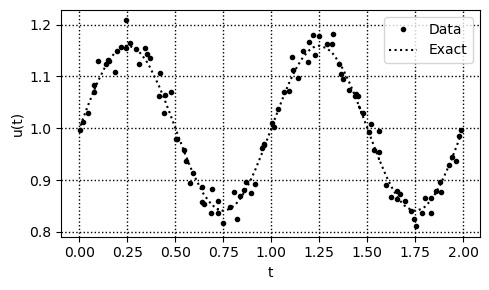

In [ ]:
def u_exact(t):
    return np.sin(2*np.pi*t)/(2*np.pi) + 1

n_data = 101
t_data_np = np.linspace(0, 2, n_data) + np.random.randn(n_data)*0.01
u_data_np = u_exact(t_data_np) + np.random.randn(n_data)*0.02

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(t_data_np, u_data_np, 'ko', ms=3, label="Data")
ax.plot(t_data_np, u_exact(t_data_np), 'k:', label="Exact")
ax.legend(loc="upper right")
ax.grid(color='k', ls=':', lw=1)
ax.set_xlabel("t")
ax.set_ylabel("u(t)")
fig.tight_layout()
plt.show()

### Modeling and Training

In [16]:
## Model
model = nn.Sequential(
    nn.Linear(1, 20),  nn.Tanh(),
    nn.Linear(20, 20), nn.Tanh(),
    nn.Linear(20, 1),
).to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-3)

## Convert numpy array to torch tensor
t_data = torch.tensor(t_data_np).float().view(-1, 1).to(device)
u_data = torch.tensor(u_data_np).float().view(-1, 1).to(device)

## Training
n_epochs = 10000
model.train()
for epoch in range(1, n_epochs + 1):
    loss = torch.mean((model(t_data) - u_data)**2) ## data loss

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch % (n_epochs // 10) == 0:
        print(f"Epoch[{epoch}/{n_epochs}] loss: {loss.item():.2e} ")

Epoch[1000/10000] loss: 1.22e-02 
Epoch[2000/10000] loss: 1.17e-02 
Epoch[3000/10000] loss: 1.09e-02 
Epoch[4000/10000] loss: 8.03e-03 
Epoch[5000/10000] loss: 1.54e-03 
Epoch[6000/10000] loss: 5.87e-04 
Epoch[7000/10000] loss: 3.82e-04 
Epoch[8000/10000] loss: 3.50e-04 
Epoch[9000/10000] loss: 3.42e-04 
Epoch[10000/10000] loss: 3.32e-04 


### Evaluation

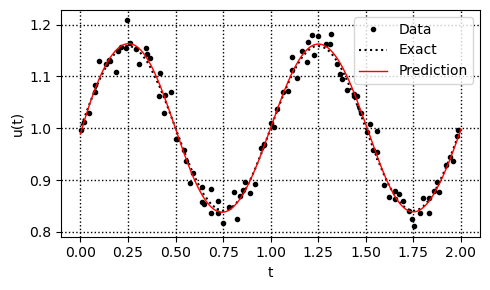

In [17]:
t_test_np = np.linspace(0, 2, 1001)
t_test = torch.tensor(t_test_np).float().view(-1, 1).to(device)

model.eval()
with torch.no_grad():
    u_pred = model(t_test)
    u_pred_np = u_pred.cpu().detach().numpy().flatten()

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(t_data_np, u_data_np, 'ko', ms=3, label="Data")
ax.plot(t_data_np, u_exact(t_data_np), 'k:', label="Exact")
ax.plot(t_test_np, u_pred_np, 'r', lw=1, label="Prediction")
ax.legend(loc="upper right")
ax.grid(color='k', ls=':', lw=1)
ax.set_xlabel("t")
ax.set_ylabel("u(t)")
fig.tight_layout()
plt.show()